# 1. Many ways of performance test of model

## 1.1 Classification

### 1.1.1 Receiver Operating Characteristic (ROC) Curve (Supervised, labelled)

ROC curve, is a graphical plot that illustrates the diagnostic ability of a binary classifier system as its discrimination threshold is varied. The ROC curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings.

true positive (TP): 
A test result that correctly indicates the presence of a condition or characteristic\
true negative (TN): 
A test result that correctly indicates the absence of a condition or characteristic\
false positive (FP): 
A test result which wrongly indicates that a particular condition or attribute is present\
false negative (FN): 
A test result which wrongly indicates that a particular condition or attribute is absent\
${\displaystyle \mathrm {TPR} ={\frac {\mathrm {TP} }{\mathrm {P} }}={\frac {\mathrm {TP} }{\mathrm {TP} +\mathrm {FN} }}=1-\mathrm {FNR} }$\
${\displaystyle \mathrm {FPR} ={\frac {\mathrm {FP} }{\mathrm {N} }}={\frac {\mathrm {FP} }{\mathrm {FP} +\mathrm {TN} }}=1-\mathrm {TNR} }$

### 1.1.2 Confusion Matrix (Supervised, labelled)

Confusion matrix, also known as an error matrix, is a specific table layout that allows visualization of the performance of an algorithm, typically a supervised learning one (in unsupervised learning it is usually called a matching matrix). It provides a summary of correct and incorrect predictions made by the algorithm. The matrix has four components: True Positives, False Positives, True Negatives, and False Negatives.

<img src="img/ConfusionMatrix.webp" alt="drawing" width="400"/>

### 1.1.3 Precision-Recall Curve (Supervised, labelled)

Precision (also called positive predictive value) is the fraction of relevant instances among the retrieved instances, while recall (also known as sensitivity) is the fraction of relevant instances that were retrieved. Both precision and recall are therefore based on relevance. The Precision-Recall curve is similar to the ROC curve but instead of the False Positive Rate, it plots the Precision (True Positives / (True Positives + False Positives)) against the Recall (True Positives / (True Positives + False Negatives)).

### 1.1.4 F1 Score (Supervised, labelled)

the F-score or F-measure is a measure of a test's accuracy. It is calculated from the precision and recall of the test, where the precision is the number of true positive results divided by the number of all positive results, including those not identified correctly, and the recall is the number of true positive results divided by the number of all samples that should have been identified as positive. The F1 score is the harmonic mean of the precision and recall. The more generic ${\displaystyle F_{\beta }}$ score applies additional weights, valuing one of precision or recall more than the other.

${\displaystyle F_{1}={\frac {2}{\mathrm {recall} ^{-1}+\mathrm {precision} ^{-1}}}=2{\frac {\mathrm {precision} \cdot \mathrm {recall} }{\mathrm {precision} +\mathrm {recall} }}={\frac {2\mathrm {tp} }{2\mathrm {tp} +\mathrm {fp} +\mathrm {fn} }}}$\
$F_\beta = \frac {(1 + \beta^2) \cdot \mathrm{true\ positive} }{(1 + \beta^2) \cdot \mathrm{true\ positive} + \beta^2 \cdot \mathrm{false\ negative} + \mathrm{false\ positive}}\,$

In [27]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, precision_recall_curve, f1_score
np.random.seed(0) # Generate some fake data
y_true = np.random.randint(2, size=100)
y_probs = np.random.rand(100)
cm = confusion_matrix(y_true, (y_probs > 0.5)) # Calculate the confusion matrix
roc_auc = roc_auc_score(y_true, y_probs) # Calculate the ROC AUC score
fpr, tpr, thresholds = roc_curve(y_true, y_probs) # Plot the ROC curve
precision, recall, thresholds = precision_recall_curve(y_true, y_probs) # Calculate the Precision-Recall curve
tick_marks = np.arange(2)
# Calculate the F1 score
f1 = f1_score(y_true, (y_probs > 0.5))
print("F1 score:", f1)
fig, ax = plt.subplots(2,2, figsize=(10,10))
a1=ax[0,0].imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax[0,0].set_title("Confusion Matrix")
fig.colorbar(a1)
ax[0,0].set_xticks(tick_marks, [0, 1])
ax[0,0].set_yticks(tick_marks, [0, 1])
ax[0,0].set_xlabel("Predicted")
ax[0,0].set_ylabel("True")
ax[1,0].plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
ax[1,0].plot([0, 1], [0, 1], 'k--')
ax[1,0].set_xlim([0.0, 1.0])
ax[1,0].set_ylim([0.0, 1.05])
ax[1,0].set_xlabel('False Positive Rate')
ax[1,0].set_ylabel('True Positive Rate')
ax[1,0].set_title('Receiver Operating Characteristic (ROC)')
ax[1,0].legend(loc="lower right")
ax[1,1].plot(recall, precision, label='Precision-Recall curve') # Plot the Precision-Recall curve
ax[1,1].set_xlabel('Recall')
ax[1,1].set_ylabel('Precision')
ax[1,1].set_title('Precision-Recall curve and ROC Curve')
ax[1,1].legend(loc="lower right")
plt.show()

F1 score: 0.5


### 1.1.5 Silhouette Score (Unsupervised, Unlabelled)

The silhouette score is a measure of how well each sample in a clustering algorithm has been classified. It provides an estimate of the similarity between an observation and the other points within its own cluster, compared to the similarity between that observation and points in other clusters. The score ranges from -1 to 1, with a high score indicating that the sample is well-matched to its own cluster and poorly-matched to other clusters. A score of 0 indicates that the sample is on or close to the decision boundary between two clusters.

The silhouette score can be a useful tool for determining the optimal number of clusters in a clustering algorithm. Generally, a higher silhouette score indicates a better clustering solution, although the optimal number of clusters may also depend on the specific requirements of the problem at hand. The silhouette score can also be visualized using a silhouette plot, which shows the silhouette score for each sample on the y-axis and the silhouette coefficient values on the x-axis.

For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.5743946554642042
For n_clusters = 6 The average silhouette_score is : 0.5141489067073599
For n_clusters = 7 The average silhouette_score is : 0.3760049728078914
For n_clusters = 8 The average silhouette_score is : 0.31390602192712663


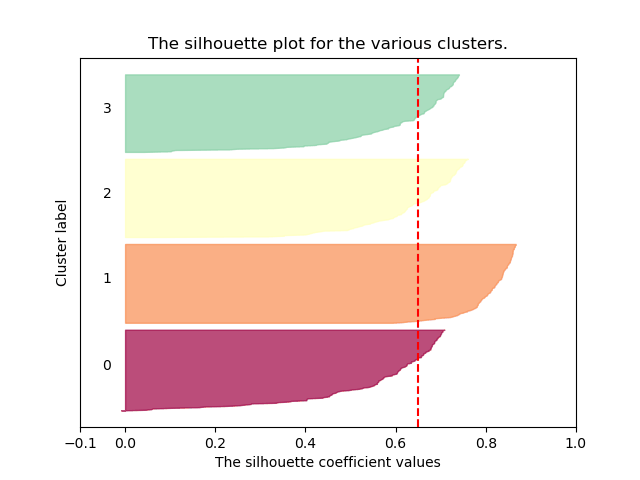

In [33]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
import os
import cv2
import imageio
from IPython.display import Image as IpyImage
X, y = make_blobs(n_samples=500, n_features=2, centers=4, random_state=1) # Generate sample data
range_n_clusters = [2, 3, 4, 5, 6, 7, 8] # Number of clusters
for n_clusters in range_n_clusters:
    km = KMeans(n_clusters=n_clusters, random_state=1) # Initialize KMeans algorithm
    cluster_labels = km.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels) # Compute the silhouette score
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)
    sample_silhouette_values = silhouette_samples(X, cluster_labels) # Compute the silhouette scores for each sample
    y_lower = 10
    for i in range(n_clusters): # Aggregate the silhouette scores for samples belonging to
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i] # cluster i, and sort them
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = plt.cm.Spectral(float(i) / n_clusters)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i)) # Label the silhouette plots with their cluster numbers at the middle
        y_lower = y_upper + 10 # Compute the new y_lower for next plot # 10 for the 0 samples
    plt.title(f"The silhouette plot for the various clusters.")
    plt.xlabel("The silhouette coefficient values")
    plt.ylabel("Cluster label")
    plt.axvline(x=silhouette_avg, color="red", linestyle="--") # The vertical line for average silhouette score of all the values
    plt.yticks([])  # Clear the yaxis labels / ticks
    plt.xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.savefig(f'graphs/silhou/silhouette0{i+1}.png')
    plt.close()
imgs = os.listdir('graphs/silhou/')
imgs.sort()
imgs=imgs[2:]
imgs = [cv2.imread('graphs/silhou/' + i) for i in imgs]
imgs = [cv2.cvtColor(i, cv2.COLOR_BGR2RGB) for i in imgs]
imageio.mimsave('graphs/sil.gif', imgs, fps=2)
path="graphs/sil.gif"
with open(path,'rb') as f:
    display(IpyImage(data=f.read(), format='png'))

### 1.1.6 Cross-Entropy Loss
Cross-entropy loss is a commonly used loss function in machine learning for classification tasks. It measures the difference between the predicted probability distribution and the actual probability distribution of a classification problem.

In other words, it calculates the distance between the predicted output and the actual output by taking into account the probability of the correct label.

Cross-entropy loss is often used in neural network models, where the predicted output is generated by passing the input through the network's layers and applying a softmax activation function to obtain a probability distribution.

The formula for cross-entropy loss can be expressed as:

$L(\theta)=-log(Softmax(z_i))=-z_i+log\sum_j exp(z_j)$\

where y is the actual probability distribution, ŷ is the predicted probability distribution, and i iterates over the number of classes.

The goal of training a model is to minimize the cross-entropy loss, which is achieved by adjusting the model's parameters through a process called backpropagation.

## 1.2 Regression
### 1.2.1 R-square

R-squared is a measure of the proportion of variance in the dependent variable (also known as the response or output variable) that can be explained by the independent variables (also known as predictors or inputs) in the regression model. R2 values range from 0 to 1, with a higher value indicating a better fit of the model to the data. R2 can be interpreted as the percentage of the total variance in the response variable that is explained by the model.

${\displaystyle {\bar {y}}={\frac {1}{n}}\sum _{i=1}^{n}y_{i}}$\
${\displaystyle SS_{\text{res}}=\sum _{i}(y_{i}-f_{i})^{2}=\sum _{i}e_{i}^{2}\,}$\
${\displaystyle SS_{\text{tot}}=\sum _{i}(y_{i}-{\bar {y}})^{2}}$\
${\displaystyle R^{2}=1-{{\sum _{i}e_{i}^{2}} \over \sum _{i}(y_{i}-{\bar {y}})^{2}}}$

### 1.2.2 RMSE

Root mean squared error (RMSE) is a measure of the difference between the actual and predicted values in a regression model. It is calculated by taking the square root of the mean of the squared differences between the actual and predicted values. The RMSE provides an estimate of the average magnitude of the errors in the predictions, with a lower RMSE indicating a better fit of the model to the data.

${\displaystyle \operatorname {RMSD} ={\sqrt {\frac {\sum _{n=1}^{N}({\hat {y}}_{n}-y_{n})^{2}}{N}}}}$

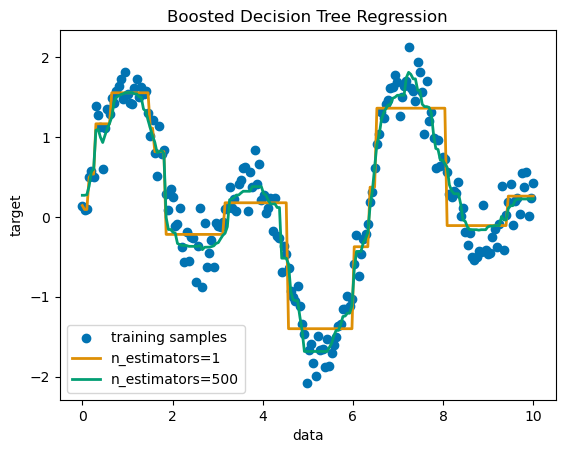

R-squared of 1 estimator:  0.8950614942381839 R-squared of 500 estimator 0.955244683821807
RMSE of 1 estimator:  0.3132427180379687 RMSE of 500 estimator 0.2045671339329079


In [113]:
import numpy as np
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score
rng = np.random.RandomState(2023)
X = np.linspace(0, 10, 200)[:, np.newaxis]
y = np.sin(X).ravel() + np.sin(2 * X).ravel() + rng.normal(0, 0.2, X.shape[0])
reg1 = DecisionTreeRegressor(max_depth=4)
reg2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4), n_estimators=500, random_state=rng)
reg1.fit(X, y)
reg2.fit(X, y)
y1 = reg1.predict(X)
y2 = reg2.predict(X)
colors = sns.color_palette("colorblind")
plt.figure()
plt.scatter(X, y, color=colors[0], label="training samples")
plt.plot(X, y1, color=colors[1], label="n_estimators=1", linewidth=2)
plt.plot(X, y2, color=colors[2], label="n_estimators=500", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Boosted Decision Tree Regression")
plt.legend()
plt.show()
r2 = r2_score(y, y1) # Compute R-squared
r22 = r2_score(y, y2)
mse = mean_squared_error(y, y1) # Compute RMSE
mse2 = mean_squared_error(y, y2)
rmse = np.sqrt(mse)
rmse2 = np.sqrt(mse2)
print("R-squared of 1 estimator: ", r2, 'R-squared of 500 estimator', r22)
print("RMSE of 1 estimator: ", rmse, 'RMSE of 500 estimator', rmse2)

# 2. Machine Learning methods
## 2.1 Classification
### 2.1.1 K-Neighbours
K-nearest neighbors (KNN) is a simple machine learning algorithm that categorizes a new data point based on its similarity to the k nearest data points in a training dataset. The idea behind KNN is that data points that are close together in the feature space belong to the same class. To make a prediction for a new data point, the algorithm finds the k training points that are closest to the new point and then assigns the most common class among these nearest neighbors as the class for the new data point. The value of k is a hyperparameter that is chosen before the model is trained, and it determines the number of nearest neighbors that are used to make a prediction.

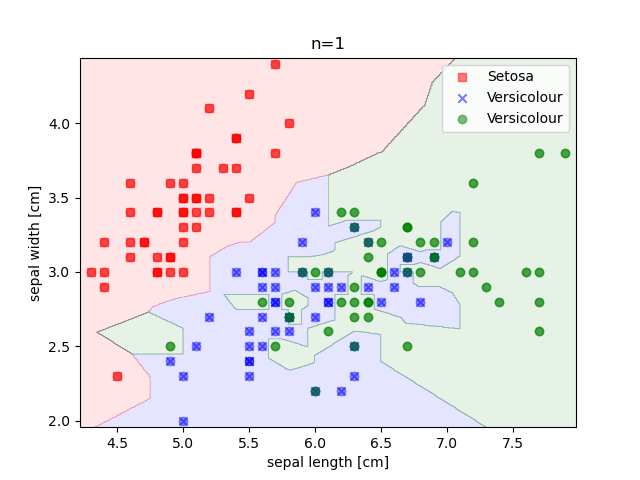

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
data_dic = datasets.load_iris()
features = data_dic['data']
targets = data_dic['target']
c1 = features[targets==0]
c2 = features[targets==1]
c3 = features[targets==2]
ind1, ind2 = 0,1
plt.scatter(c1[:,ind1],c1[:,ind2], color='red', marker='s', alpha=0.5, label="Setosa")
plt.scatter(c2[:,ind1],c2[:,ind2], color='blue', marker='x', alpha=0.5, label="Versicolour")
plt.scatter(c3[:,ind1],c3[:,ind2], color='green', marker='o', alpha=0.5, label="Versicolour")
plt.legend()
plt.xlabel("sepal length [cm]")
plt.ylabel("sepal width [cm]");
def subSample(nData):
    X = np.empty((3*nData,2))
    X[:nData] = c1[:nData,(ind1, ind2)]
    X[nData:2*nData] = c2[:nData,(ind1, ind2)]
    X[2*nData:] = c3[:nData,(ind1, ind2)]
    Y = np.empty(3*nData)
    Y[:nData] = np.zeros(nData)
    Y[nData:2*nData] = np.ones(nData)
    Y[2*nData:] = 2*np.ones(nData)
    return X,Y
X, Y = subSample(50)
scaler = StandardScaler()
X = scaler.fit_transform(X)
resolution=0.01
def regions3(X, y, classifier, colors = ['red','blue','green']):
    markers = ('s', 'x', 'o', '^', 'v') # setup marker generator and color map
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1 # plot the decision surface
    x2_min, x2_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                            np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    rescaledX = scaler.inverse_transform(np.array([xx1.ravel(), xx2.ravel()]).T) # inverse scaling of xx1 and xx2
    xx1_rescaled = rescaledX[:,0].reshape(xx1.shape)
    xx2_rescaled = rescaledX[:,1].reshape(xx2.shape)
    plt.contourf(xx1_rescaled, xx2_rescaled, Z, alpha=0.1, cmap=cmap)
    plt.xlim(xx1_rescaled.min(), xx1_rescaled.max())
    plt.ylim(xx2_rescaled.min(), xx2_rescaled.max())
    c2 = scaler.inverse_transform(X[y==2])
    c1 = scaler.inverse_transform(X[y==1])
    c0 = scaler.inverse_transform(X[y==0])
    xb,yb=c0[:,0],c0[:,1]
    plt.scatter(xb,yb,color=colors[0],alpha=0.4)
    xb,yb=c1[:,0],c1[:,1]
    plt.scatter(xb,yb,color=colors[1],alpha=0.4)
    xb,yb=c2[:,0],c2[:,1]
    plt.scatter(xb,yb,color=colors[2],alpha=0.4)
    plt.xlabel('sepal length [cm]')
    plt.ylabel('sepal width [cm]');
for k in [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,30]:
    KNclass = KNeighborsClassifier(n_neighbors=k)
    KNclass.fit(X, Y)
    regions3(X, Y, KNclass)
    plt.title("n={}".format(k))
    if k <= 9:
        plt.savefig(f'graphs/K/k0{k}.png')
    else :
        plt.savefig(f'graphs/K/k{k}.png')
    plt.close()
imgs = os.listdir('graphs/K/')
imgs.sort()
imgs=imgs[1:]
imgs = [cv2.imread('graphs/K/' + i) for i in imgs]
imgs = [cv2.cvtColor(i, cv2.COLOR_BGR2RGB) for i in imgs]
imageio.mimsave('graphs/k.gif', imgs, fps=1.5)
path="graphs/k.gif"
with open(path,'rb') as f:
    display(IpyImage(data=f.read(), format='png'))

### 2.1.2 Logistic Regression

Logistic Regression is a statistical method used for binary classification problems, where the target variable can only take two values (e.g. yes/no, 0/1, etc.). It is a type of Generalized Linear Model (GLM) and is used to model the relationship between a set of predictor variables (also known as independent variables, inputs, or features) and a binary response variable.

In Logistic Regression, the predicted probabilities of the target variable are modeled using a logistic function, which maps the output of a linear combination of the predictor variables to a value between 0 and 1. The predicted probabilities can then be transformed into binary predictions using a threshold value (e.g. 0.5). The coefficients of the predictor variables in the linear combination are estimated using maximum likelihood estimation.

Logistic Regression is a simple and widely used method for binary classification problems and is particularly useful when the relationship between the predictor variables and the target variable is approximately linear. However, it can be limited in its ability to model complex non-linear relationships and may not perform well when the target variable is highly imbalanced.

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
data = load_breast_cancer() # Load the breast cancer dataset
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) # Split the data into training and test sets
logistic_regression = LogisticRegression(solver='sag', max_iter=100000) # Train the logistic regression model
logistic_regression.fit(X_train, y_train)
y_pred = logistic_regression.predict(X_test) # Make predictions on the test set
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
plt.scatter(np.arange(len(y_test)), y_test, c='blue', marker='o', label='True Value') # Plot the results
plt.scatter(np.arange(len(y_pred)), y_pred, c='red', marker='x', label='Prediction')
plt.legend()
plt.xlabel('Sample Index')
plt.ylabel('Target Value')
plt.title('Logistic Regression Results')
plt.show()

Accuracy: 0.9473684210526315


### 2.1.3 Supportive Vector Machine (SVM)

Support Vector Machine (SVM) is a type of supervised learning algorithm used for classification and regression problems. SVM tries to find a hyperplane that separates the data into classes in a way that maximizes the margin between the classes. The margin is defined as the distance between the closest data points from each class and the hyperplane. These closest data points are called the support vectors, and they play a key role in determining the location of the hyperplane.

In binary classification problems, SVM finds a hyperplane that separates the positive and negative classes. In multi-class classification problems, SVM creates multiple binary classifiers, one for each class pair, and chooses the best classifier based on the maximum margin.

SVM can handle non-linear classification problems by transforming the data into a higher dimensional space and finding a hyperplane in that space. This is achieved through a technique called kernel trick, where a kernel function is used to project the data into a higher dimensional space without actually computing the projections.

SVM has several advantages over other machine learning algorithms, such as good performance on high dimensional data, ability to handle non-linear classification problems, and robustness against overfitting. However, SVM can be computationally expensive for large datasets and may not perform well when the number of features is much larger than the number of samples.

In [99]:
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.inspection import DecisionBoundaryDisplay
iris = datasets.load_iris()
X = iris.data[:, :2] # Take the first two features
y = iris.target
C = 2.0  # SVM regularization parameter
models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=100000),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=4, gamma="auto", C=C),)
models = (SVM.fit(X, y) for SVM in models)
titles = ( # title for the plots
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 4) kernel",)
fig, sub = plt.subplots(2, 2,figsize=(10,10)) # Set-up 2x2 grid for plotting.
plt.subplots_adjust(wspace=0.4, hspace=0.4)
X0, X1 = X[:, 0], X[:, 1]
for SVM, title, ax in zip(models, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(SVM, X, response_method="predict",
        cmap=plt.cm.twilight,
        alpha=0.8, ax=ax,
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
plt.show()

### 2.1.4 Random Forest
ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time. For classification tasks, the output of the random forest is the class selected by most trees. For regression tasks, the mean or average prediction of the individual trees is returned.

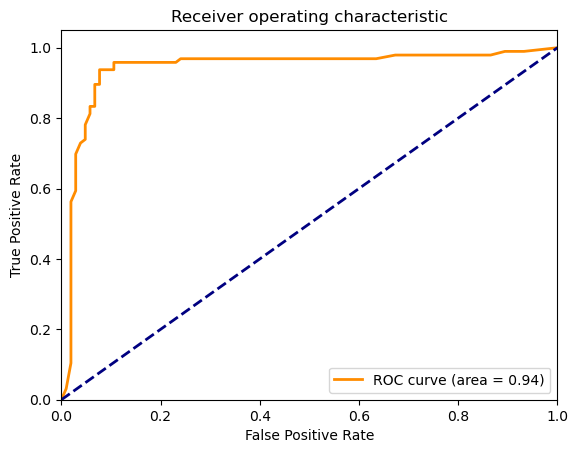

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, auc
import tensorflow as tf
import matplotlib.pyplot as plt
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=0, random_state=42) # Generate a toy dataset
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42) # Split the dataset into training and testing sets
rf = RandomForestClassifier(n_estimators=100, random_state=42) # Train a Random Forest classifier
rf.fit(train_X, train_y)
probs = rf.predict_proba(test_X) # Make predictions on the testing set
preds = probs[:,1]
fpr, tpr, _ = roc_curve(test_y, preds) # Compute the ROC curve and AUC
roc_auc = auc(fpr, tpr)
fig, ax = plt.subplots() # Plot the ROC curve and AUC
ax.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver operating characteristic')
ax.legend(loc="lower right")
plt.show()

## 2.2 Regression
### 2.2.1 Multiple Linear Regression, Ridge, Lasso Regression and Polynomial Regression
Multiple Linear Regression: Multiple linear regression is a statistical method used to model the relationship between multiple independent variables (also known as predictors, features, or inputs) and a dependent variable (also known as the response, target, or output). The goal of multiple linear regression is to find the linear combination of the independent variables that best predicts the dependent variable. The relationship between the variables is modeled as a linear equation, where the coefficients represent the strengths of the relationships between each independent variable and the dependent variable.

Polynomial Regression: Polynomial regression is a type of regression analysis that models the relationship between the independent variable and the dependent variable as an nth degree polynomial. The polynomial equation can capture non-linear relationships between the variables, and is especially useful when the relationship is not well-approximated by a linear model. The polynomial coefficients are estimated using regression techniques, and the polynomial equation is used to make predictions for new values of the independent variable.

Ridge Regression: Ridge regression is a regularized version of linear regression that adds a penalty term to the cost function used to estimate the coefficients of the model. The penalty term is the sum of the squares of the coefficients, multiplied by a regularization parameter, alpha. The regularization parameter controls the amount of shrinkage applied to the coefficients, and helps to prevent overfitting in the model. Overfitting occurs when the model is too complex and fits the training data too closely, leading to poor performance on new, unseen data. Ridge regression reduces the magnitude of the coefficients and improves the generalization ability of the model.

Lasso Regression: Lasso regression is another regularized version of linear regression that adds a penalty term to the cost function used to estimate the coefficients of the model. The penalty term is the sum of the absolute values of the coefficients, multiplied by a regularization parameter, alpha. The regularization parameter controls the amount of shrinkage applied to the coefficients, and helps to prevent overfitting in the model. Unlike ridge regression, lasso regression has the added advantage of performing feature selection by setting some coefficients to zero, effectively removing those features from the model. This can improve the interpretability of the model and reduce the risk of overfitting.

In [138]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
data_url = "http://lib.stat.cmu.edu/datasets/boston" # Load the Boston housing dataset
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
y = raw_df.values[1::2, 2]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2023) # Split the data into training and testing sets
regressor = LinearRegression() # Multiple Linear Regression
regressor.fit(X_train, y_train)
y_pred_mlr = regressor.predict(X_test)
poly_reg = PolynomialFeatures(degree=3) # Polynomial Regression
X_poly = poly_reg.fit_transform(X)
regressor_poly = LinearRegression()
regressor_poly.fit(X_poly, y)
y_pred_poly = regressor_poly.predict(poly_reg.transform(X_test))
ridge_reg = Ridge(alpha=0.8) # Ridge Regression
ridge_reg.fit(X_train, y_train)
y_pred_ridge = ridge_reg.predict(X_test)
lasso_reg = Lasso(alpha=0.1)  # Lasso Regression
lasso_reg.fit(X_train, y_train)
y_pred_lasso = lasso_reg.predict(X_test)
print("Multiple Linear Regression R2 Score:", regressor.score(X_test, y_test)) # Evaluate the models
print("Polynomial Regression R2 Score:", regressor_poly.score(poly_reg.transform(X_test), y_test))
print("Ridge Regression R2 Score:", ridge_reg.score(X_test, y_test))
print("Lasso Regression R2 Score:", lasso_reg.score(X_test, y_test))
plt.scatter(y_test, y_pred_mlr, color='blue', label='Multiple Linear Regression') # Plot the results
plt.scatter(y_test, y_pred_poly, color='red', label='Polynomial Regression')
plt.scatter(y_test, y_pred_ridge, color='green', label='Ridge Regression')
plt.scatter(y_test, y_pred_lasso, color='yellow', label='Lasso Regression')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.legend()
plt.show()

Multiple Linear Regression R2 Score: 0.7271717469533565
Polynomial Regression R2 Score: 0.9980463318155662
Ridge Regression R2 Score: 0.7252758516321669
Lasso Regression R2 Score: 0.7147621168357111


### 2.2.2 Ridge and Lasso Regularization

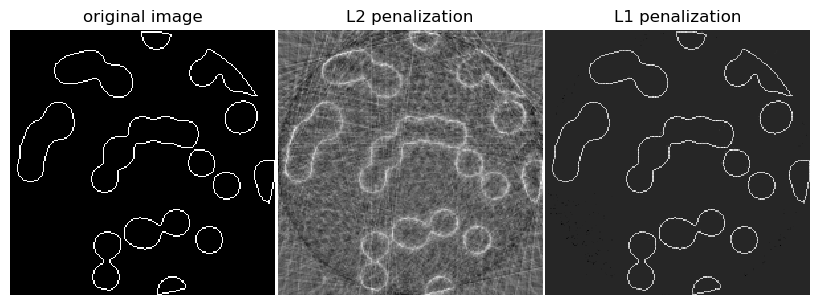

In [140]:
import numpy as np
from scipy import sparse
from scipy import ndimage
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
def _weights(x, dx=1, orig=0):
    x = np.ravel(x)
    floor_x = np.floor((x - orig) / dx).astype(np.int64)
    alpha = (x - orig - floor_x * dx) / dx
    return np.hstack((floor_x, floor_x + 1)), np.hstack((1 - alpha, alpha))
def _generate_center_coordinates(l_x):
    X, Y = np.mgrid[:l_x, :l_x].astype(np.float64)
    center = l_x / 2.0
    X += 0.5 - center
    Y += 0.5 - center
    return X, Y
def build_projection_operator(l_x, n_dir):
    X, Y = _generate_center_coordinates(l_x)
    angles = np.linspace(0, np.pi, n_dir, endpoint=False)
    data_inds, weights, camera_inds = [], [], []
    data_unravel_indices = np.arange(l_x**2)
    data_unravel_indices = np.hstack((data_unravel_indices, data_unravel_indices))
    for i, angle in enumerate(angles):
        Xrot = np.cos(angle) * X - np.sin(angle) * Y
        inds, w = _weights(Xrot, dx=1, orig=X.min())
        mask = np.logical_and(inds >= 0, inds < l_x)
        weights += list(w[mask])
        camera_inds += list(inds[mask] + i * l_x)
        data_inds += list(data_unravel_indices[mask])
    proj_operator = sparse.coo_matrix((weights, (camera_inds, data_inds)))
    return proj_operator
def generate_synthetic_data():
    rs = np.random.RandomState(2023)
    n_pts = 36
    x, y = np.ogrid[0:l, 0:l]
    mask_outer = (x - l / 2.0) ** 2 + (y - l / 2.0) ** 2 < (l / 2.0) ** 2
    mask = np.zeros((l, l))
    points = l * rs.rand(2, n_pts)
    mask[(points[0]).astype(int), (points[1]).astype(int)] = 1
    mask = ndimage.gaussian_filter(mask, sigma=l / n_pts)
    res = np.logical_and(mask > mask.mean(), mask_outer)
    return np.logical_xor(res, ndimage.binary_erosion(res))
l = 200 # Generate synthetic images, and projections
proj_operator = build_projection_operator(l, l // 7)
data = generate_synthetic_data()
proj = proj_operator @ data.ravel()[:, np.newaxis]
proj += 0.15 * np.random.randn(*proj.shape)
rgr_ridge = Ridge(alpha=0.2) # Reconstruction with L2 (Ridge) penalization
rgr_ridge.fit(proj_operator, proj.ravel())
rec_l2 = rgr_ridge.coef_.reshape(l, l)
rgr_lasso = Lasso(alpha=0.001) # Reconstruction with L1 (Lasso) penalization
rgr_lasso.fit(proj_operator, proj.ravel()) # the best value of alpha was determined using cross validation
rec_l1 = rgr_lasso.coef_.reshape(l, l) # with LassoCV
plt.figure(figsize=(8, 3.3))
plt.subplot(131)
plt.imshow(data, cmap=plt.cm.gray, interpolation="nearest")
plt.axis("off")
plt.title("original image")
plt.subplot(132)
plt.imshow(rec_l2, cmap=plt.cm.gray, interpolation="nearest")
plt.title("L2 penalization")
plt.axis("off")
plt.subplot(133)
plt.imshow(rec_l1, cmap=plt.cm.gray, interpolation="nearest")
plt.title("L1 penalization")
plt.axis("off")
plt.subplots_adjust(hspace=0.01, wspace=0.01, top=1, bottom=0, left=0, right=1)
plt.show()

### 2.2.3 LAD (Least Absolute Deviations) Regression
LAD Regression (Least Absolute Deviations Regression) is a type of regression analysis that minimizes the sum of the absolute differences between the observed values and the predicted values of the dependent variable. Unlike least squares regression, which minimizes the sum of the squares of the differences between the observed and predicted values, LAD regression minimizes the sum of the absolute differences. This makes LAD regression more robust to outliers, as it is not affected by extreme values in the same way that least squares regression is.

LAD regression is also known as the median regression or robust regression, as it is less sensitive to outliers than other regression methods. The goal of LAD regression is to find the coefficients of the independent variables that minimize the absolute differences between the observed and predicted values of the dependent variable. The coefficients are estimated using optimization techniques, and the model is used to make predictions for new values of the independent variables.

LAD regression is a useful method for modeling non-linear relationships between the independent and dependent variables, and is especially useful in situations where the data contains outliers or other extreme values. LAD regression is also computationally efficient, as it can be solved using linear programming methods.

In [154]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
x = np.random.rand(100, 1) # Load the data
y = 2 + 3 * x + np.random.rand(100, 1)
x = sm.add_constant(x) # Add a constant to the independent variable for the intercept term
model = sm.RLM(y, x, M=sm.robust.norms.HuberT()) # Fit the LAD regression model
results = model.fit()
y_pred = results.predict(x) # Make predictions using the LAD regression model
plt.scatter(y, y_pred) # Plot the observed values against the predicted values
plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
plt.title('LAD Regression')
plt.show()

### 2.2.4 Bayesian Ridge and Lasso Regression

Bayesian Ridge Regression is a Bayesian version of Ridge Regression, which is a linear regression method that adds a L2 regularization term to the objective function. In Bayesian Ridge Regression, the regularization term is modeled as a Gaussian prior over the coefficients, with a mean of zero and a precision (inverse of the variance) parameter. The precision parameter is estimated along with the coefficients, which allows the model to account for uncertainty in the coefficients and also reduces the risk of overfitting.

Bayesian Lasso Regression is a Bayesian version of Lasso Regression, which is a linear regression method that adds a L1 regularization term to the objective function. In Bayesian Lasso Regression, the regularization term is modeled as a Laplace prior over the coefficients, with a mean of zero and a scale parameter. The scale parameter is estimated along with the coefficients, which allows the model to account for uncertainty in the coefficients and also reduces the risk of overfitting.

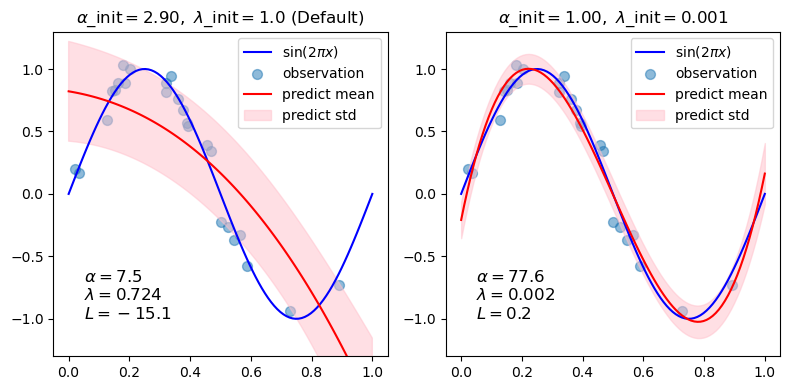

In [163]:
import numpy as np
from sklearn.linear_model import BayesianRidge
import matplotlib.pyplot as plt
def func(x):
    return np.sin(2 * np.pi * x)
size = 25
rng = np.random.RandomState(2023)
x_train = rng.uniform(0.0, 1.0, size)
y_train = func(x_train) + rng.normal(scale=0.1, size=size)
x_test = np.linspace(0.0, 1.0, 100)
n_order = 3
X_train = np.vander(x_train, n_order + 1, increasing=True)
X_test = np.vander(x_test, n_order + 1, increasing=True)
reg = BayesianRidge(tol=1e-6, fit_intercept=False, compute_score=True)
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
for i, ax in enumerate(axes): # Bayesian ridge regression with different initial value pairs
    if i == 0:
        init = [1 / np.var(y_train), 1.0]  # Default values
    elif i == 1:
        init = [1.0, 1e-3]
        reg.set_params(alpha_init=init[0], lambda_init=init[1])
    reg.fit(X_train, y_train)
    ymean, ystd = reg.predict(X_test, return_std=True)
    ax.plot(x_test, func(x_test), color="blue", label="sin($2\\pi x$)")
    ax.scatter(x_train, y_train, s=50, alpha=0.5, label="observation")
    ax.plot(x_test, ymean, color="red", label="predict mean")
    ax.fill_between(x_test, ymean - ystd, ymean + ystd, color="pink", alpha=0.5, label="predict std")
    ax.set_ylim(-1.3, 1.3)
    ax.legend()
    title = "$\\alpha$_init$={:.2f},\\ \\lambda$_init$={}$".format(init[0], init[1])
    if i == 0:
        title += " (Default)"
    ax.set_title(title, fontsize=12)
    text = "$\\alpha={:.1f}$\n$\\lambda={:.3f}$\n$L={:.1f}$".format(reg.alpha_, reg.lambda_, reg.scores_[-1])
    ax.text(0.05, -1.0, text, fontsize=12)
plt.tight_layout()
plt.show()

### 2.2.5 Neural Network Regression

2023-03-14 16:27:15.356103: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-03-14 16:27:15.798518: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.



....................................................................................................
....................................................................................................
.......................................................................................

2023-03-14 16:27:36.246922: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-03-14 16:27:36.572735: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.



....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
...............................................................................

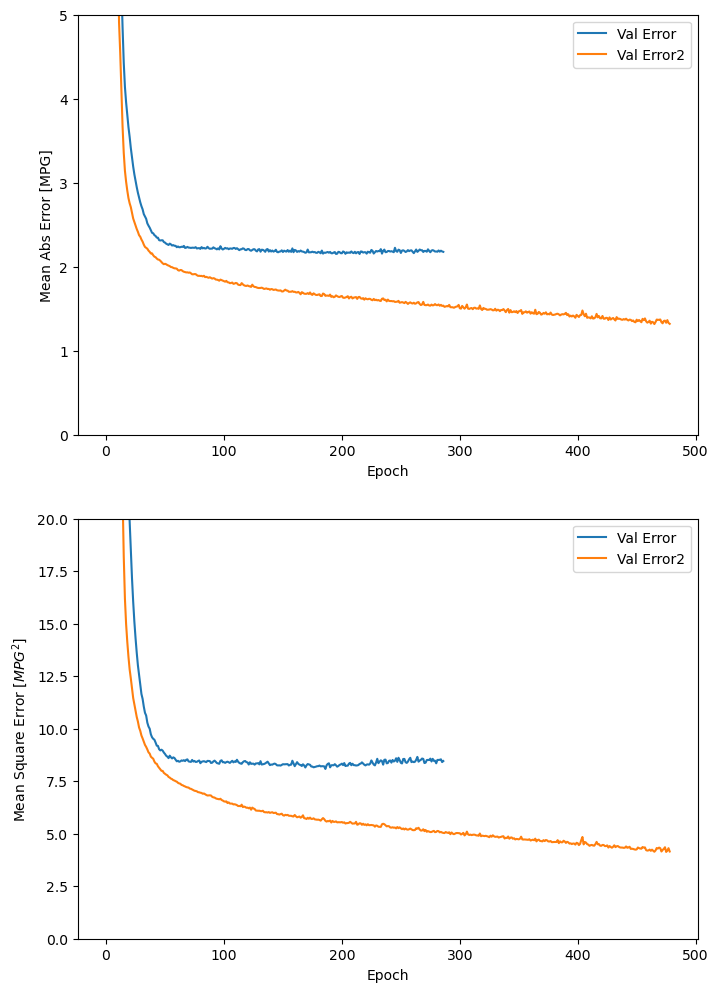

3/3 - 0s - loss: 5.5904 - mae: 1.8535 - mse: 5.5904 - 71ms/epoch - 24ms/step
3/3 - 0s - loss: 5.8310 - mae: 1.9116 - mse: 5.8310 - 57ms/epoch - 19ms/step
Gaussian weighted and bias NN error:  1.85 MPG
default weighted and bias NN error:  1.91 MPG
3/3 [==============================] - 0s 10ms/step


2023-03-14 16:28:07.704442: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-03-14 16:28:07.835138: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [174]:
import pathlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
class MyLayer(tf.keras.layers.Layer):
    weights=[]
    biases=[]
    def __init__(self, units=32, activation=None):
        super(MyLayer, self).__init__()
        self.units = units
        self.activation = tf.keras.activations.get(activation)
        self.weights=[]
        self.biases=[]
        weights=[]
        biases=[]
    def build(self, input_shape):
        self.w = self.add_weight(shape=(input_shape[-1], self.units), initializer='random_normal', trainable=True)
        self.b = self.add_weight(shape=(self.units,), initializer='random_normal',trainable=True)
    def call(self, inputs):
        self.weights.append(self.w)
        self.biases.append(self.b)
        self.avw=sum(self.weights)/len(self.weights)
        self.avb=sum(self.biases)/len(self.biases)
        x = tf.matmul(inputs, self.avw) + self.avb
        if self.activation is not None:
            x = self.activation(x)
        return x
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight', 'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(dataset_path, names=column_names, na_values = "?", comment='\t', sep=" ", skipinitialspace=True)
dataset = raw_dataset.copy()
dataset.tail()
dataset.isna().sum()
dataset = dataset.dropna()
origin = dataset.pop('Origin')
dataset['USA'] = (origin == 1)*1.0
dataset['Europe'] = (origin == 2)*1.0
dataset['Japan'] = (origin == 3)*1.0
dataset.tail()
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index)
train_stats = train_dataset.describe()
train_stats.pop("MPG")
train_stats = train_stats.transpose()
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)
def build_model():
    model = keras.Sequential([Input(shape=(len(train_dataset.keys()),)),
    MyLayer(64, activation='relu'),
    MyLayer(64, activation='relu'),
    layers.Dense(1)])
    optimizer = tf.keras.optimizers.Adam(0.001)
    model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])
    return model
def build_model2():
    model = keras.Sequential([Input(shape=(len(train_dataset.keys()),)),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)])
    optimizer = tf.keras.optimizers.Adam(0.001)
    model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])
    return model
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')
def plot_history(history, history2):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    hist2 = pd.DataFrame(history2.history)
    hist2['epoch'] = history2.epoch
    plt.figure(figsize=(8,12))
    plt.subplot(2,1,1)
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [MPG]')
    plt.plot(hist['epoch'], hist['val_mae'], label = 'Val Error')
    plt.plot(hist2['epoch'], hist2['mae'], label='Val Error2')
    plt.ylim([0,5])
    plt.legend()
    plt.subplot(2,1,2)
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [$MPG^2$]')
    plt.plot(hist['epoch'], hist['val_mse'], label = 'Val Error')
    plt.plot(hist2['epoch'], hist2['mse'], label='Val Error2')
    plt.ylim([0,20])
    plt.legend()
    plt.show()
EPOCHS = 2000
model = build_model()
model2 = build_model2()
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=100)
history = model.fit(normed_train_data, train_labels, epochs=EPOCHS, validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])
history2 = model2.fit(normed_train_data, train_labels, epochs=EPOCHS, validation_split = 0.2, verbose=0, callbacks=[early_stop, PrintDot()])
plot_history(history, history2)
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)
loss2, mae2, mse2 = model2.evaluate(normed_test_data, test_labels, verbose=2)
print("Gaussian weighted and bias NN error: {:5.2f} MPG".format(mae))
print("default weighted and bias NN error: {:5.2f} MPG".format(mae2))
test_predictions = model.predict(normed_test_data).flatten()
test_predictions2 = model2.predict(normed_test_data).flatten()
plt.scatter(test_labels, test_predictions)
plt.scatter(test_labels, test_predictions2)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

### 2.2.6 Supportive Vector Regression

# 3. Neural Networks methods

## 3.1 Autoencoder and Variate Autoencoder (VAE)

## 3.2 U-Net

## 3.3 Generative Adversarial Network (GAN) and Deep Convolutional GAN

## 3.4 Self-Normalizing Neural Networks (SELU)

SELU is found to be a good activation function for GANs and we use that in the first two dense networks. 

## 3.5 (Self) Compatitivly Generative Network (CGN) - Ensemble model of GAN

Two GAN models trained by discriminators with the same dataset. After few epochs later, two GANs generate the same prediction compatitively and final discriminator choose better one and worse one get feedback from final discriminator.

develop to tournament model

# 4. Computer Vision methods

## 4.1 Object Detection

## 4.2 Object Segmentation

## 4.3 Style Transfer

## 4.4 Super-Resolution with GAN, Autoencoder

## 4.5 3D reconstruction methods

### 4.5.1 Stereopsis

### 4.5.2 Multiview Stereo

### 4.5.3 Structure from Motion

# 5. Tensorflow 2 

## 5.1 Layers (Dense, Flatten, Convolution, Dropout, )

### 5.1.1 Dense Layer

It connects each node in the layer to every node in the previous layer. The dense layer is used in a feedforward neural network. It is used when the input data is a vector or when a neural network has multiple layers and we want to reduce the dimensionality between layers.

### 5.1.2 Flatten Layer

A flatten layer is used to convert a high dimensional matrix into a 1-dimensional vector. It is used to convert the high-dimensional tensors into 1D tensors. It is used after the convolution layer when we need to pass the output of convolution layer to dense layer.

### 5.1.3 Convolution Layer

A convolution layer is used in convolutional neural networks (CNNs) to perform feature extraction and image classification tasks. Convolution layers apply filters to local regions of the input data to extract features. It is used for image classification problems. The Convolution layer reduces the spatial dimensions of the input tensor, but increases the number of channels.

### 5.1.4 Dropout Layer

A dropout layer is used to prevent overfitting in neural networks. It randomly drops out (turns off) some of the nodes during training, forcing the network to learn to make predictions based on the remaining nodes. It is used before the final dense layer of the Neural Network.

### 5.1.5 Recurrent Layer

A recurrent layer is used in recurrent neural networks (RNNs) to process sequential data, such as time series or text data. Recurrent layers allow the network to maintain information from previous time steps and make predictions based on that information.

### 5.1.6 Embedding Layer

An embedding layer is used to convert categorical variables into a continuous vector representation. It is commonly used in natural language processing tasks.

In [72]:
import numpy as np
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")
input1 = np.array([[0.1, 0.2, 0.3, 0.4]]) # Input data
input2 = np.array([[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]])
input_dense = tf.keras.Input(shape=(4,)) # Define inputs for each layer
input_flatten = tf.keras.Input(shape=(4,))
input_conv1d = tf.keras.Input(shape=(8, 1))
input_dropout = tf.keras.Input(shape=(4,))
input_recurrent = tf.keras.Input(shape=(8, 1))
input_embedding = tf.keras.Input(shape=(4,))
dense = tf.keras.layers.Dense(units=4, activation='relu')(input_dense) # Define Dense layer
flatten = tf.keras.layers.Flatten()(input_flatten) # Define Flatten layer
conv1d = tf.keras.layers.Conv1D(filters=2, kernel_size=2, activation='relu')(input_conv1d) # Define Conv1D layer
dropout = tf.keras.layers.Dropout(rate=0.5)(input_dropout) # Define Dropout layer
recurrent = tf.keras.layers.SimpleRNN(units=8, activation='relu')(input_recurrent) # Define SimpleRNN layer
embedding = tf.keras.layers.Embedding(input_dim=4, output_dim=2)(input_embedding) # Define Embedding layer
model_dense = tf.keras.Model(inputs=input_dense, outputs=dense) # Create model instances
model_flatten = tf.keras.Model(inputs=input_flatten, outputs=flatten)
model_conv1d = tf.keras.Model(inputs=input_conv1d, outputs=conv1d)
model_dropout = tf.keras.Model(inputs=input_dropout, outputs=dropout)
model_recurrent = tf.keras.Model(inputs=input_recurrent, outputs=recurrent)
model_embedding = tf.keras.Model(inputs=input_embedding, outputs=embedding)
output_dense = model_dense.predict(np.array(input1)) # Predict and compare outputs of each model
output_flatten = model_flatten.predict(np.array(input1))
output_conv1d = model_conv1d.predict(np.array(input2).reshape(1, 8, 1))
output_dropout = model_dropout.predict(np.array(input1))
output_recurrent = model_recurrent.predict(np.array(input2))
output_embedding = model_embedding.predict(np.array(input1))
print("Dense layer output shape:", output_dense, output_dense.shape) # shape of the output from each layer
print("Flatten layer output shape:", output_flatten, output_flatten.shape)
print("Convolution layer output shape:", output_conv1d, output_conv1d.shape)
print("Dropout layer output shape:", output_dropout, output_dropout.shape)
print("Recurrent layer output shape:", output_recurrent, output_recurrent.shape)
print("Embedding layer output shape:", output_embedding, output_embedding.shape)

1/1 [==============================] - 0s 15ms/step


2023-03-09 19:49:35.358555: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-03-09 19:49:35.395560: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-03-09 19:49:35.427790: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-03-09 19:49:35.469337: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-03-09 19:49:35.535883: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 24ms/step
Dense layer output shape: [[0.05027977 0.07198095 0.         0.        ]] (1, 4)
Flatten layer output shape: [[0.1 0.2 0.3 0.4]] (1, 4)
Convolution layer output shape: [[[0.03633683 0.        ]
  [0.03568454 0.        ]
  [0.03503224 0.        ]
  [0.03437996 0.        ]
  [0.03372768 0.        ]
  [0.03307536 0.        ]
  [0.03242309 0.        ]]] (1, 7, 2)
Dropout layer output shape: [[0.1 0.2 0.3 0.4]] (1, 4)
Recurrent layer output shape: [[0.         1.0188038  0.61733603 0.07433677 0.22913711 0.00199106
  0.4233116  0.72547626]] (1, 8)
Embedding layer output shape: [[[-0.0188207   0.03263413]
  [-0.0188207   0.03263413]
  [-0.0188207   0.03263413]
  [-0.0188207   0.03263413]]] (1, 4, 2)


2023-03-09 19:49:35.607302: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


## 5.2 Activations (ReLU, Sigmoid, LeakyReLU, Hyperbolic Tangent)

In [73]:
import tensorflow as tf
import tensorflow.keras as keras
# Leaky ReLU
# TensorFlow2
layer = tf.keras.layers.LeakyReLU()
output = layer([-3.0, -1.0, 0.0, 2.0])
print(list(output.numpy()))
layer = tf.keras.layers.LeakyReLU(alpha=0.1)
output = layer([-3.0, -1.0, 0.0, 2.0])
print(list(output.numpy()))

[-0.90000004, -0.3, 0.0, 2.0]
[-0.3, -0.1, 0.0, 2.0]


## 5.3 Batch and Batch Normalization

## 5.4 Functional API in TensorFlow2

## 5.5 Gradient Tape in TensorFlow2

# 6. OpenCV
## 6.1 Image read

[[  0   0  15  20   1 134 233 253 253 253 255 229 130   1  29   2   0   0]
 [  0   1   5  18   0 137 232 255 254 247 255 228 129   0  24   2   0   0]
 [  7   5   2  28   2 139 230 254 255 249 255 226 128   0  27   3   2   2]
 [ 25  27  28  38   0 129 236 255 253 249 251 227 129   0  36  27  27  27]
 [  2   0   0   4   2 130 239 254 254 254 255 230 126   0   4   2   0   0]
 [132 129 131 124 121 163 211 226 227 225 226 203 164 125 125 129 131 131]
 [234 227 230 229 232 205 151 115 125 124 117 156 205 232 229 225 228 228]
 [254 255 255 251 255 222 102   1   0   0   0 120 225 255 254 255 255 255]
 [254 255 254 255 253 225 104   0  50  46   0 120 233 254 247 253 251 253]
 [252 250 250 253 254 223 105   2  45  50   0 127 223 255 251 255 251 253]
 [254 255 255 252 255 226 104   0   1   1   0 120 229 255 255 254 255 255]
 [233 235 231 233 234 207 142 106 108 102 108 146 207 235 237 232 231 231]
 [132 132 131 132 130 175 207 223 224 224 224 210 165 134 130 136 134 134]
 [  1   1   3   0   0 129

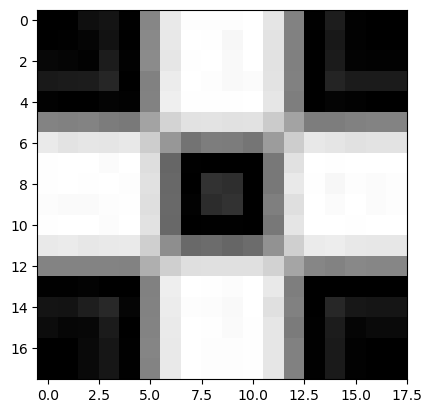

In [148]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image
cb_img = cv2.imread("img/checkerboard_fuzzy_18x18.jpg",0)
plt.imshow(cb_img, cmap='gray')
print(cb_img)

## 6.2 Color and save image

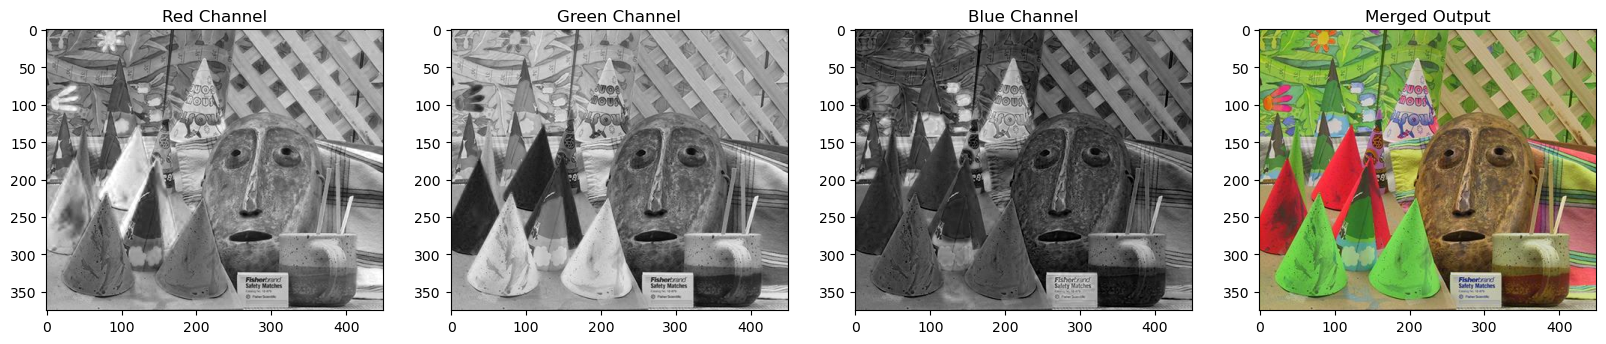

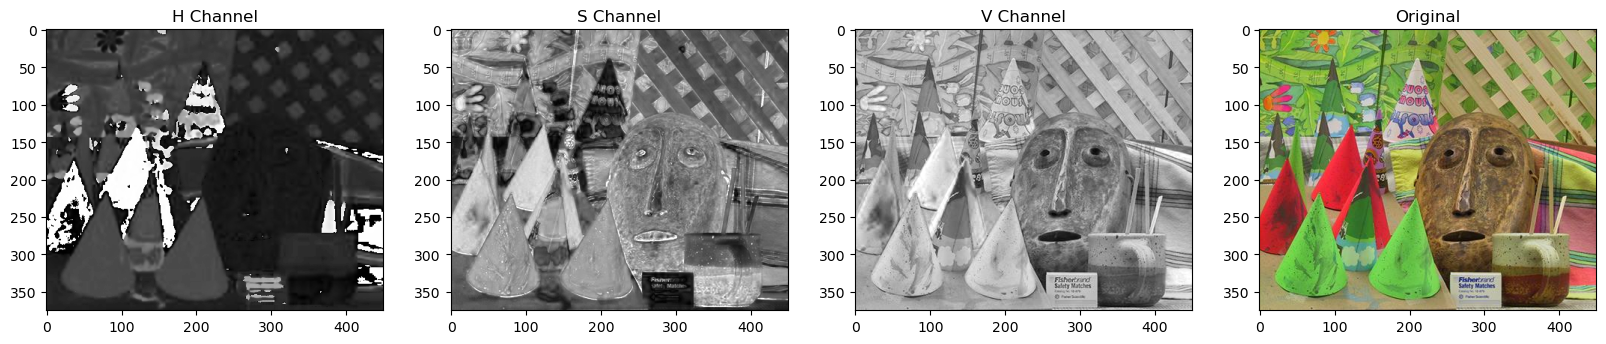

In [152]:
img_bgr = cv2.imread("img/right.png",cv2.IMREAD_COLOR)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
r,g,b = cv2.split(img_rgb)
# Show the channels
plt.figure(figsize=[20,5])
plt.subplot(141);plt.imshow(r,cmap='gray');plt.title("Red Channel");
plt.subplot(142);plt.imshow(g,cmap='gray');plt.title("Green Channel");
plt.subplot(143);plt.imshow(b,cmap='gray');plt.title("Blue Channel");
# Merge the individual channels into a BGR image
imgMerged = cv2.merge((r,g,b))
# Show the merged output
plt.subplot(144);plt.imshow(imgMerged);plt.title("Merged Output");

img_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)
# Split the image into the B,G,R components
h,s,v = cv2.split(img_hsv)
# Show the channels
plt.figure(figsize=[20,5])
plt.subplot(141);plt.imshow(h,cmap='gray');plt.title("H Channel");
plt.subplot(142);plt.imshow(s,cmap='gray');plt.title("S Channel");
plt.subplot(143);plt.imshow(v,cmap='gray');plt.title("V Channel");
plt.subplot(144);plt.imshow(img_rgb);plt.title("Original");

# save the image
#cv2.imwrite("dd.png", img_bgr)

## 6.3 Resize image and Annotation

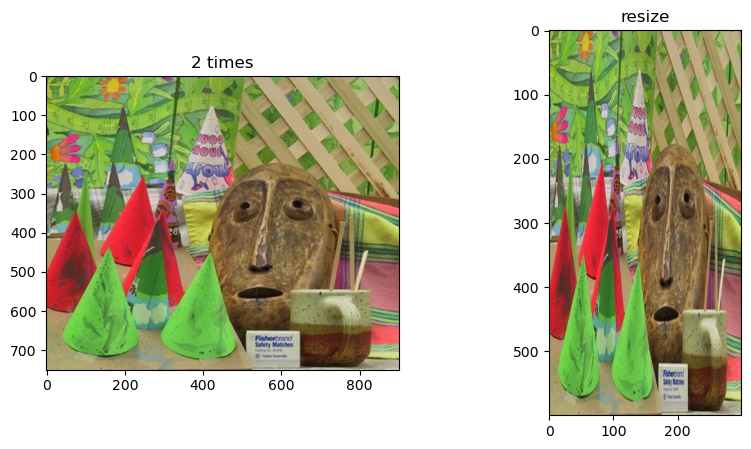

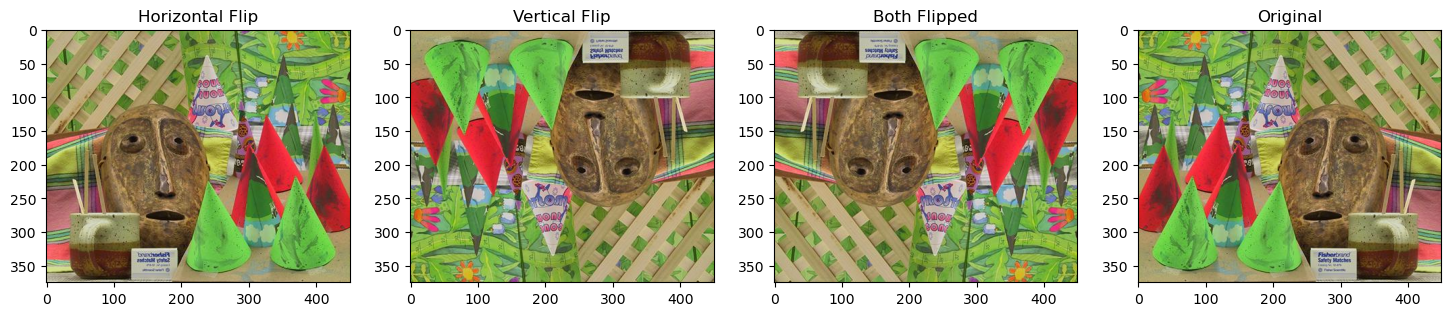

In [168]:
resized_cropped_region_2x = cv2.resize(img_rgb,None,fx=2, fy=2)


resized_cropped_region = cv2.resize(img_rgb, dsize=(300,600), interpolation=cv2.INTER_AREA)

plt.figure(figsize=[10,5])
plt.subplot(121);plt.imshow(resized_cropped_region_2x);plt.title('2 times')
plt.subplot(122);plt.imshow(resized_cropped_region);plt.title('resize')

img_rgb_flipped_horz = cv2.flip(img_rgb, 1)
img_rgb_flipped_vert = cv2.flip(img_rgb, 0)
img_rgb_flipped_both = cv2.flip(img_rgb, -1)

# Show the images
plt.figure(figsize=[18,5])
plt.subplot(141);plt.imshow(img_rgb_flipped_horz);plt.title("Horizontal Flip");
plt.subplot(142);plt.imshow(img_rgb_flipped_vert);plt.title("Vertical Flip");
plt.subplot(143);plt.imshow(img_rgb_flipped_both);plt.title("Both Flipped");
plt.subplot(144);plt.imshow(img_rgb);plt.title("Original");

imageRectangle = img_rgb.copy()

cv2.rectangle(imageRectangle, (200, 110), (370,350), (255, 0, 255), thickness=5, lineType=cv2.LINE_8)
cv2.putText(imageRectangle, 'mask', (250, 370), cv2.FONT_HERSHEY_PLAIN, 2.3, (0,255,0), 2, cv2.LINE_AA)
plt.figure(figsize=[6,5])
plt.plot();plt.imshow(imageRectangle)

## 6.4 Brightness, Contrast, Thresholding

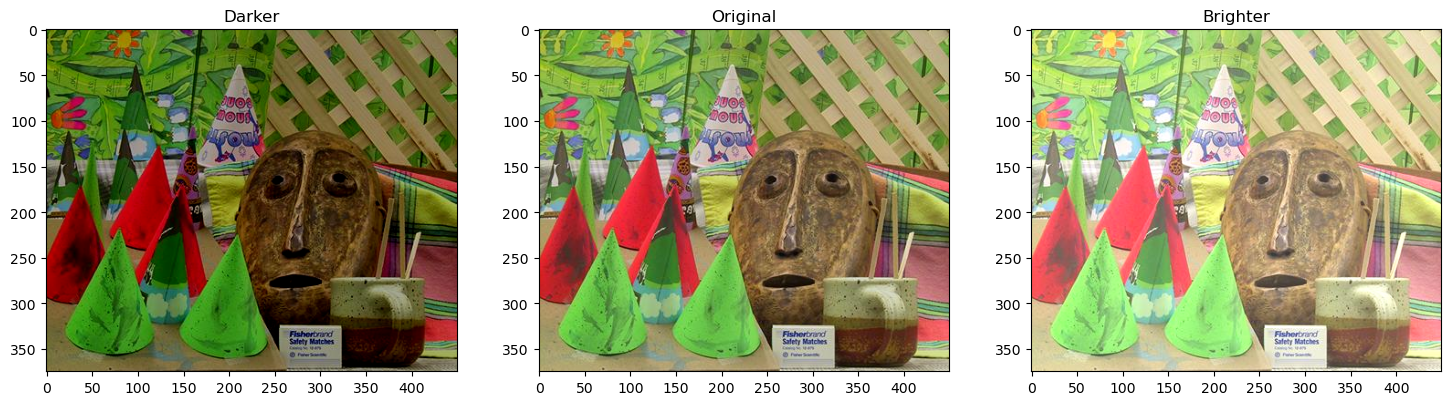

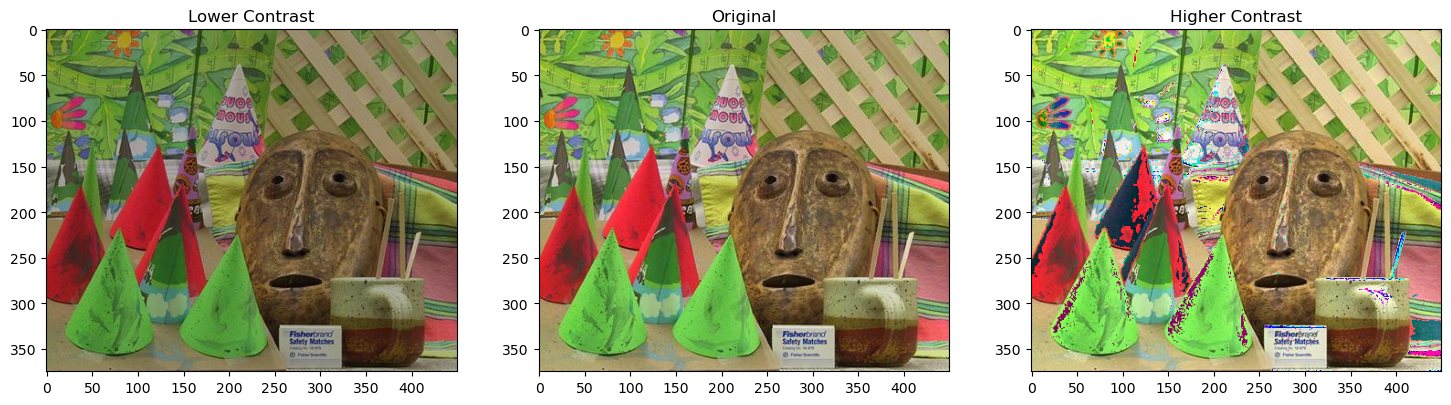

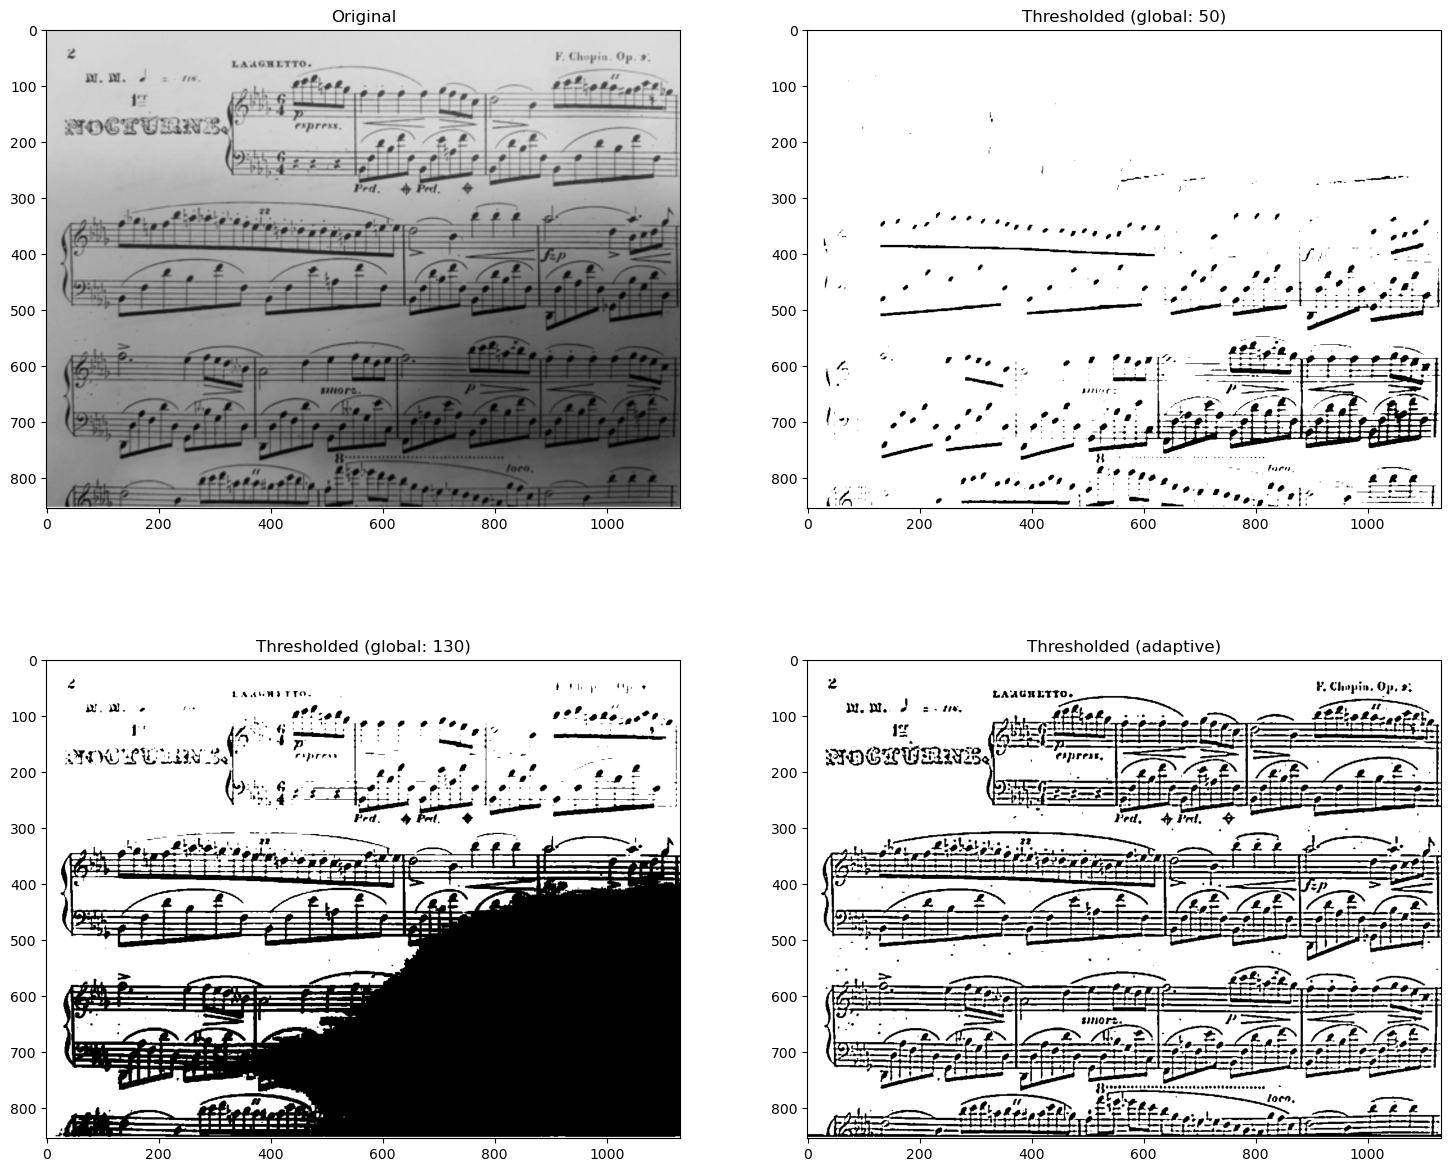

In [172]:
img_rgb = cv2.cvtColor(cv2.imread("img/right.png",cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)
matrix = np.ones(img_rgb.shape, dtype = "uint8") * 50
img_rgb_brighter = cv2.add(img_rgb, matrix)
img_rgb_darker   = cv2.subtract(img_rgb, matrix)
# Show the images
plt.figure(figsize=[18,5])
plt.subplot(131); plt.imshow(img_rgb_darker);  plt.title("Darker");
plt.subplot(132); plt.imshow(img_rgb);         plt.title("Original");
plt.subplot(133); plt.imshow(img_rgb_brighter);plt.title("Brighter");

matrix1 = np.ones(img_rgb.shape) * .8
matrix2 = np.ones(img_rgb.shape) * 1.2
img_rgb_darker   = np.uint8(cv2.multiply(np.float64(img_rgb), matrix1))
img_rgb_brighter = np.uint8(cv2.multiply(np.float64(img_rgb), matrix2))
# Show the images
plt.figure(figsize=[18,5])
plt.subplot(131); plt.imshow(img_rgb_darker);  plt.title("Lower Contrast");
plt.subplot(132); plt.imshow(img_rgb);         plt.title("Original");
plt.subplot(133); plt.imshow(img_rgb_brighter);plt.title("Higher Contrast");

img_read = cv2.imread("img/Piano_Sheet_Music.png", cv2.IMREAD_GRAYSCALE) # Read the original image
retval, img_thresh_gbl_1 = cv2.threshold(img_read,50, 255, cv2.THRESH_BINARY) # Perform global thresholding
retval, img_thresh_gbl_2 = cv2.threshold(img_read,130, 255, cv2.THRESH_BINARY) # Perform global thresholding
img_thresh_adp = cv2.adaptiveThreshold(img_read, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 7) # Perform adaptive thresholding
# Show the images
plt.figure(figsize=[18,15])
plt.subplot(221); plt.imshow(img_read,        cmap="gray");  plt.title("Original");
plt.subplot(222); plt.imshow(img_thresh_gbl_1,cmap="gray");  plt.title("Thresholded (global: 50)");
plt.subplot(223); plt.imshow(img_thresh_gbl_2,cmap="gray");  plt.title("Thresholded (global: 130)");
plt.subplot(224); plt.imshow(img_thresh_adp,  cmap="gray");  plt.title("Thresholded (adaptive)");

In [3]:
import cv2
import numpy as np
import svgwrite
import svgpathtools
def vectorize_image(image_path, output_path):
    # Read the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Threshold the image
    _, binary_image = cv2.threshold(image, 128, 255, cv2.THRESH_BINARY_INV)

    # Find contours
    contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Create an SVG canvas
    dwg = svgwrite.Drawing(output_path, profile='tiny', size=(image.shape[1], image.shape[0]))

    # Add contours to the SVG canvas
    for contour in contours:
        points = [tuple(map(float, point[0])) for point in contour]
        polyline = dwg.polyline(points, stroke='black', fill='none', stroke_width=1)
        dwg.add(polyline)

    # Save the SVG file
    dwg.save()

image_path = 'img/left.png'
output_path = 'img/output.svg'
vectorize_image(image_path, output_path)
paths, attributes = svgpathtools.svg2paths('img/output.svg')


# Reinforcement Learning

(375, 450)
[[159 157 151 148 153]
 [155 161 154 151 158]
 [143 160 150 152 169]
 [154 163 157 161 174]
 [155 155 161 169 177]]


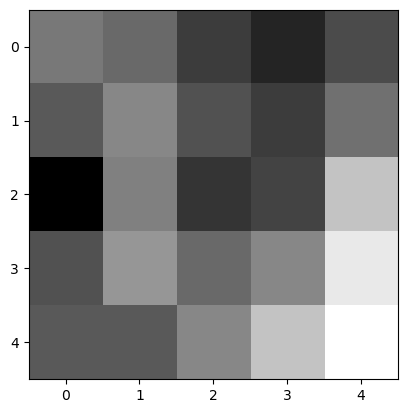

In [53]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
left = cv2.cvtColor(cv2.imread('img/left.png'),cv2.COLOR_BGR2GRAY)
plt.imshow(left,cmap='gray')
print(left.shape)
left2=left[270:275,223:228]
print(left2)
plt.imshow(left2,cmap='gray')

(375, 450, 3)
[[[187 152 122]
  [192 147 118]
  [183 143 108]
  [168 147 104]
  [159 160 103]]

 [[186 147 116]
  [195 152 118]
  [182 149 108]
  [165 153 101]
  [155 170 105]]

 [[177 134 100]
  [188 155 112]
  [165 152  99]
  [152 163  97]
  [152 189 109]]

 [[186 146 110]
  [184 162 112]
  [163 165 100]
  [151 178 101]
  [147 200 110]]

 [[182 150 109]
  [168 159 102]
  [160 173 101]
  [154 189 107]
  [146 206 110]]]


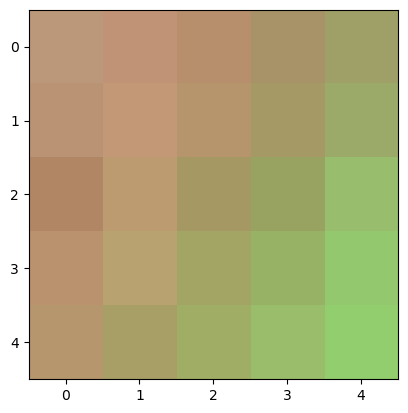

In [21]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
left = cv2.cvtColor(cv2.imread('img/left.png'),cv2.COLOR_BGR2RGB)
plt.imshow(left)
print(left.shape)
left2=left[270:275,223:228,:]
print(left2)
plt.imshow(left2)

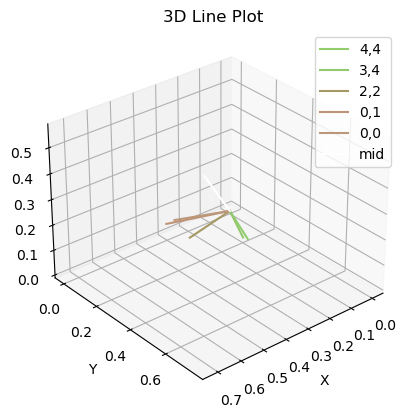

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
def unitvec(n):
    x=n[0]
    y=n[1]
    z=n[2]
    mag=np.sqrt(x**2+y**2+z**2)
    if x ==0 and y == 0 and z == 0:
        return 0,0,0,(0,0,0)
    return np.array([0,x/mag]), np.array([0,y/mag]), np.array([0,z/mag]) ,(x/255,y/255,z/255)
# Create figure and 3D axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the line
ax.plot(unitvec(left2[4,4,:])[0], unitvec(left2[4,4,:])[1], unitvec(left2[4,4,:])[2],c=unitvec(left2[4,4,:])[3], label='4,4')
ax.plot(unitvec(left2[3,4,:])[0], unitvec(left2[3,4,:])[1], unitvec(left2[3,4,:])[2],c=unitvec(left2[3,4,:])[3], label='3,4')
ax.plot(unitvec(left2[2,2,:])[0], unitvec(left2[2,2,:])[1], unitvec(left2[2,2,:])[2],c=unitvec(left2[2,2,:])[3], label='2,2')
ax.plot(unitvec(left2[0,1,:])[0], unitvec(left2[0,1,:])[1], unitvec(left2[0,1,:])[2],c=unitvec(left2[0,1,:])[3], label='0,1')
ax.plot(unitvec(left2[0,0,:])[0], unitvec(left2[0,0,:])[1], unitvec(left2[0,0,:])[2],c=unitvec(left2[0,0,:])[3], label='0,0')
ax.plot(unitvec([255,255,255])[0], unitvec([255,255,255])[1], unitvec([255,255,255])[2],c=unitvec([255,255,255])[3], label='mid')

# Set axis labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D Line Plot')
ax.legend()
ax.view_init(30, 50, 0)
# Show the plot
plt.show()


In [176]:
import cv2

def upscale_video(input_video, output_video, scale_factor=2):
    # Open the input video
    video = cv2.VideoCapture(input_video)
    fps = int(video.get(cv2.CAP_PROP_FPS))
    width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH) * scale_factor)
    height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT) * scale_factor)

    # Create the output video
    fourcc = cv2.VideoWriter_fourcc(*"mp4v")
    out = cv2.VideoWriter(output_video, fourcc, fps, (width, height))

    while True:
        ret, frame = video.read()
        if not ret:
            break

        # Upscale the frame using INTER_CUBIC interpolation
        upscaled_frame = cv2.resize(frame, (width, height), interpolation=cv2.INTER_CUBIC)
        out.write(upscaled_frame)

    video.release()
    out.release()

input_video = "vid/race_car.mp4"
output_video = "vid/upscaled_video.mp4"

upscale_video(input_video, output_video)
